* This is my practice version based on a mix of my enrolled degrees and courses.
* LinkedIn: https://www.linkedin.com/in/binh-nguyen-797319248/
* Email: binhnguyen.ibm@gmail.com

# **I. SUMMARY OF LINEAR REGRESSION AND OLS**

## **1.Simple Linear Regression and OLS**
### 1.1. The model

A simple regression model assumes a linear relationship between one feature $x_1$ and the target $y$:

$$
y_i = b + w_1\,x_{1,i} + \varepsilon_i,\quad i = 1,2,\dots,n
$$

- $b$ is the intercept (bias term).  
- $w_1$ is the weight (slope) on feature $x_1$.  
- $\varepsilon_i$ is the residual, with $\mathbb{E}[\varepsilon_i]=0$ and $\mathrm{Var}(\varepsilon_i)=\sigma^2$.

---

### 1.2. Ordinary Least Square

There are approaches to estimate the cofficients of the Simple Linear Regression model. The typical one is Ordinary Leaset Square (OLS), in which we choose $b,w_1$ to minimize the **Residual Sum of Squares (RSS)**:

$$
\min_{b,w_1}\sum_{i=1}^n \varepsilon_i^2 \;=\; \min_{b,w_1}
\sum_{i=1}^n \bigl(y_i - (b + w_1\,x_{1,i})\bigr)^2
$$

---

### 1.3. Closed‑Form Solutions (OLS)

1. Define
$$
     x_{1,i}' = x_{1,i} - \bar x_1,\quad
     y_i' = y_i - \bar y.
   $$

2. Weight (slope)  
$$
w_1 
= \frac{\displaystyle\sum_{i=1}^n x'_{1,i}\,y'_i}
       {\displaystyle\sum_{i=1}^n (x'_{1,i})^2}
\;=\;
\frac{\mathrm{Cov}(x_1, y)}{\mathrm{Var}(x_1)}
$$

5. Intercept (bias)
$$
     b = \bar y - w_1\,\bar x_1.
$$

---

## **2. Variance Decomposition**

The total variability in $y$ decomposes as:

$$
\underbrace{\sum_{i=1}^n (y_i - \bar y)^2}_{\mathrm{SST}}
=
\underbrace{\sum_{i=1}^n (\hat y_i - \bar y)^2}_{\mathrm{SSR}}
+
\underbrace{\sum_{i=1}^n (y_i - \hat y_i)^2}_{\mathrm{SSE}}
$$

where  
- $\text{SST}$ = Total Sum of Squares  
- $\text{SSR}$ = Regression Sum of Squares  
- $\text{SSE}$ = Error (Residual) Sum of Squares

---

## **3. Hypothesis Testing (using centered variables)**

First estimate the residual variance:

$$
\hat\sigma_e^2
=
\frac{1}{n-2}\sum_{i=1}^n\bigl(y_i - \hat y_i\bigr)^2
$$

---

### 3.1. Test on the slope $w_1$

- Hypotheses:  
  $$
  H_0:\;w_1 = 0,\qquad H_a:\;w_1 \neq 0
  $$
- $\text{Standard error}$:  
  $$
  \mathrm{SE}(\,\hat w_1\,)
  =
  \frac{\hat\sigma_e}
       {\sqrt{\displaystyle\sum_{i=1}^n (x'_{1,i})^2}}
  $$
- $\text{t-statistic}$:
  $$
  t_{n-2}
  =
  \frac{\hat w_1 - 0}{\mathrm{SE}(\hat w_1)},
  \quad
  t_{n-2}\sim t_{n-2}
  $$

---

### 3.2. Test on the intercept $b$

- Hypotheses:  
  $$
  H_0:\;b = b_0,\qquad H_a:\;b \neq b_0
  $$
- $\text{Standard error}$:

  $$
  \mathrm{SE}(\,\hat b\,)
  =
  \hat\sigma_e
  \,\sqrt{\,
    \frac{1}{n}
    \;+\;
    \frac{\bar x_1^{2}}
         {\displaystyle\sum_{i=1}^n (x'_{1,i})^2}
  \,}
  $$
- $\text{t-statistic}$:

  $$
  t_{n-2}
  =
  \frac{\hat b - b_0}{\mathrm{SE}(\hat b)},
  \quad
  t_{n-2}\sim t_{n-2}
  $$

---

### 3.3. Coefficient of determination $R^2$

- Definition  
  $$
  R^2 = 1 - \frac{\mathrm{SSE}}{\mathrm{SST}}
      = \frac{\mathrm{SSR}}{\mathrm{SST}}
  $$
- Hypotheses 
  $$
  H_0: R^2 = 0
  \quad\Bigl(\text{no explanatory power}\Bigr),
  \qquad
  H_a: R^2 > 0
  \quad\Bigl(\text{model explains some variation}\Bigr)
  $$

---

### 3.4. The $F$‑test

- Hypotheses
  $$
  H_0: \beta_1 = \beta_2 = \cdots = \beta_k = 0
  \quad\Bigl(\text{all slopes are zero}\Bigr),
  \qquad
  H_a: \text{at least one }\beta_j \neq 0
  \quad\Bigl(\text{some slope is nonzero}\Bigr)
  $$
  - In simple regression $k=1$, this reduces to  
    $$
    H_0: w_1 = 0,
    \qquad
    H_a: w_1 \neq 0.
    $$
- $\text{F‑statistic}$
  $$
  F
  =
  \frac{(\mathrm{SSR}/k)}{(\mathrm{SSE}/(n-k-1))}
  \;=\;
  \frac{(R^2/k)}{\bigl((1-R^2)/(n-k-1)\bigr)},
  \quad
  F\sim F_{k,\,n-k-1}
  $$
  - For $k=1$, $F = t_{w_1}^2$ and $F\sim F_{1,\,n-2}$.
  - In general, the lower the $\text{F‑statistic}$, the closer to a statistically non-significant model.

# **II. PYTHON IMPLEMENTATION**

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## **1. Example 1**

### 1.1. Importing data

In [7]:
GPA_SAT = pd.read_csv('Noah_ML_Data/Noah_ML_2_GPA-SAT.csv')

In [8]:
GPA_SAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [9]:
GPA_SAT.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


* We will create a Linear Regression which predicts GPA based on SAT score.
* Always ask our self: why would we predict GPA using SAT score?

### 1.2. Define the features and target

$$
GPA = b + w_1SAT
$$

In [13]:
y = GPA_SAT.GPA
x1 = GPA_SAT.SAT

### 1.3. Initial plots

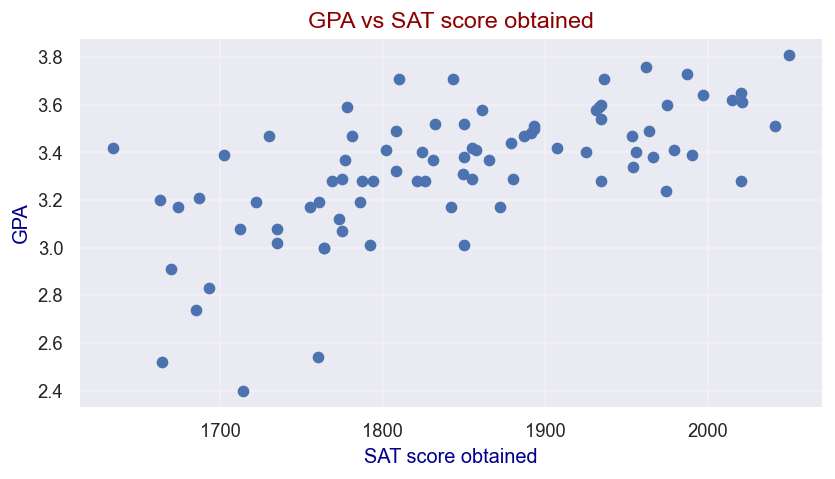

In [15]:
plt.figure(figsize = (8, 4), dpi = 120)
plt.scatter(x1, y)
plt.title('GPA vs SAT score obtained', fontsize = 14, color = 'darkred')
plt.xlabel('SAT score obtained', fontsize = 12, color = 'darkblue')
plt.ylabel('GPA', fontsize = 12, color = 'darkblue')
plt.grid(alpha = 0.3);

### 1.4. Run the model

* Recall how we incorporate $b$ into $w$, from which we have $x_0 = 1$.
* Our model hence can be written as $\hat{y} = 1w_0 + w_1 \cdot SAT$.
* In `statsmodel`, the corresponding method for this is `.add_constant(x1)`.

In [18]:
# Run the model

x = sm.add_constant(x1)
model = sm.OLS(y, x).fit() # fit the model (train the model)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           7.20e-11
Time:                        21:36:49   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Access the estimated parameters
# Note that const = b (the intercept), while SAT is the coefficient w1 for the feature SAT (x1) here

model.params

const    0.275040
SAT      0.001656
dtype: float64

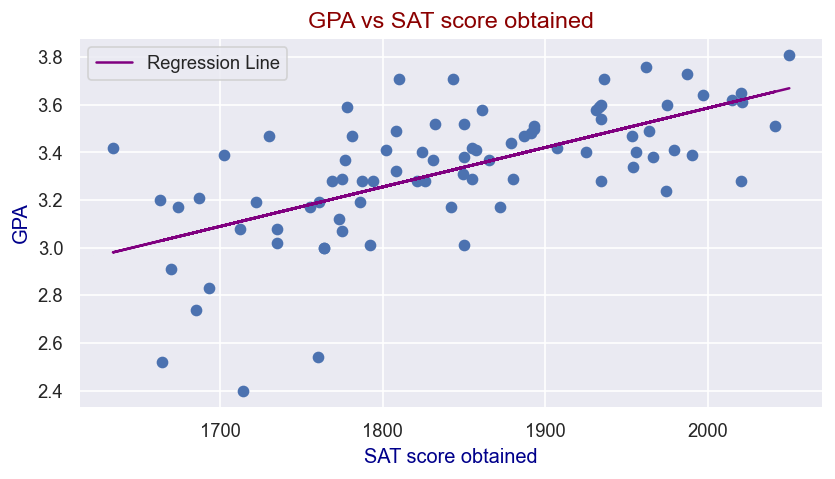

In [21]:
# Plot manually

plt.figure(figsize = (8, 4), dpi = 120)
plt.scatter(x1, y)

yhat =  model.params[0] + model.params[1] * x1
fig = plt.plot(x1, yhat, lw = 1.5, color = 'purple', label = 'Regression Line')

plt.title('GPA vs SAT score obtained', fontsize = 14, color = 'darkred')
plt.xlabel('SAT score obtained', fontsize = 12, color = 'darkblue')
plt.ylabel('GPA', fontsize = 12, color = 'darkblue')

plt.legend();

### 1.5. Write a simple and re-usable function for Linear regression using OLS

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def LinRegres_OLS(df, x_col, y_col, plot=True, title=None):
    # Fit
    x = df[x_col]
    y = df[y_col]
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    if plot:
        fig, ax = plt.subplots(figsize =  (8,4), dpi =  120)
        # scatter + regression line
        ax.scatter(x, y, alpha = 0.7)
        yhat = model.params['const'] + model.params[x_col] * x
        ax.plot(x, yhat, lw = 1.5, label =  'Regression Line', color = 'purple')

        # build equation text
        b, w1 = model.params['const'], model.params[x_col]
        eq_text = rf"$\hat{{{y_col}}} = {b:.3f} + {w1:.3f}\,{x_col}$"

        # place it in the top‐left of the axes (in axes‐fraction coords)
        ax.text(
            0.05, 0.95,              # 5% from left, 95% from bottom
            eq_text,
            transform = ax.transAxes,  # interpret coords in [0,1]×[0,1]
            fontsize = 12,
            verticalalignment = 'top',
            bbox = dict(facecolor = 'white', alpha=0.5, edgecolor = 'black'))

        # labels, title, grid
        ax.set_title(title or f"{y_col} vs {x_col}", fontsize = 14, color= 'darkred')
        ax.set_xlabel(x_col, fontsize = 12, color = 'darkblue')
        ax.set_ylabel(y_col, fontsize = 12, color = 'darkblue')
        ax.legend()
        plt.show()

    return model

## **2. Another example**

In [25]:
RE = pd.read_csv('Noah_ML_Data/Noah_ML_2_Real-estate.csv')

In [26]:
RE.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


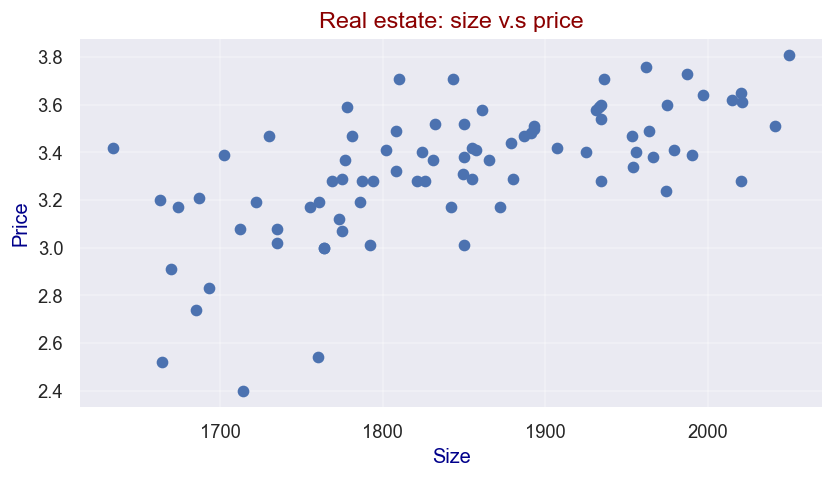

In [27]:
# It's a good practice to write out the model and plot it 

# target: price; x1: size
# model: price = b + w1 * size

# Plot to see if a linear model is a reasonable candidate
plt.figure(figsize = (8, 4), dpi = 120)
plt.scatter(x1, y)
plt.title('Real estate: size v.s price', fontsize = 14, color = 'darkred')
plt.xlabel('Size', fontsize = 12, color = 'darkblue')
plt.ylabel('Price', fontsize = 12, color = 'darkblue')
plt.grid(alpha = 0.3);

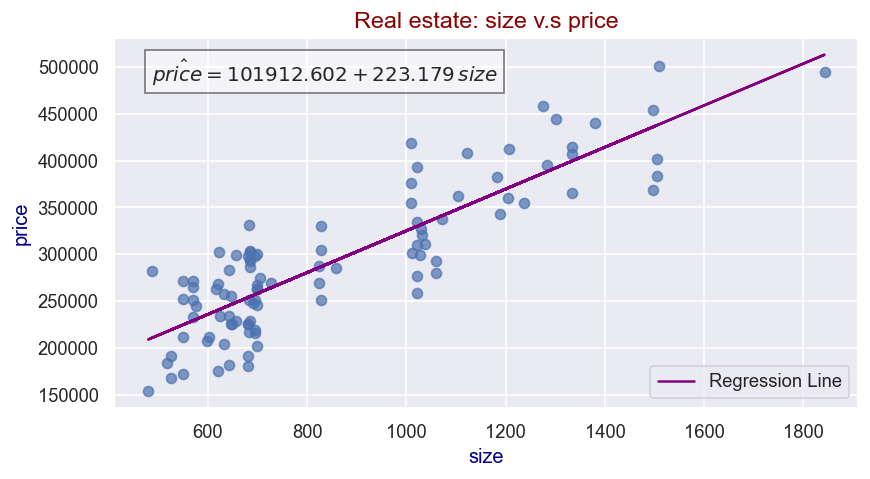

In [28]:
# Now we can try our pre-built model

RE_LinRegress = LinRegres_OLS(RE, x_col = 'size', y_col = 'price', plot=True, title = 'Real estate: size v.s price')

In [29]:
RE_LinRegress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           8.13e-31
Time:                        21:36:49   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
RE_LinRegress.params

const    101912.601801
size        223.178743
dtype: float64

## **3. Read the output from `.summary()`**

**Hypothesis testing of the coefficients**
* In the second summary table, `const` and `size` are $b$ and $w_1$ in our model.
* Next we have `P > |t|` contains the p-value for the hypothesis testing. The null hypothesis for $b$ is $H_0: b = 0$. For the data `RE`, the p-value is 0, hence we can reject the null hypothesis, implying that $b$ is statistically different from 0.
* Note that if we accept $H_0: b = 0$, then the intercept term vanishes and the model simplifies. For example, instead of $\hat{price} = 101912.602 + 223.189 \times {size}$, we would have $\hat{price} = 223.189 \times {size}$.
* Similarly the null hypothesis for $w_1$ is $H_0: w_1 = 0$. For the data `RE` we also reject it, implying that $size$ has an effect on $price$ by the coefficient of $223.189$. If we accept this hypothesis, then the model becomes $\hat{price} = 101912.602$.
* In overall, if any value in `P > |t|` is less than 0.05, then that variable is statistically significant.

**Decomposition of variability**
* Recall that $\text{Sum of Squares Total} = \text{Sum of Squares Regression} + \text{Sum of Squares Error}$, or, $\text{SST} = \text{SSR} + \text{SSE}$.
* In the first summary table, we have `R-squared` = 0.745, and this is identical to $\text{SSR} / \text{SST}$.